<a href="https://colab.research.google.com/github/calebsiyasiya/MIT-805-Project/blob/main/MIT_805_Assignemnt_2_Post_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Mount Google drive where data is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read in first spark output**

In [50]:
#Read in the modified csv file from first Spark operation
output1 = pd.read_csv('/content/drive/MyDrive/MIT 805 Semester Project/zara_modified_expanded.csv')
output1.head(3)

,sku,name,description,price,currency,terms,section,image_downloads
0,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,jackets,MAN,'e8e4ae57-8b72-44ff-aa5d-84de3ed37d9e'
1,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,jackets,MAN,'0cb3791f-ebc3-4311-ae9b-39688130a258'
2,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,jackets,MAN,'6831411d-91a5-458d-b6eb-8657ac66ce12'


In [51]:
#remove apostrophes from image names and add jpg extension to all image names
output1['image_downloads'] = output1['image_downloads'].apply(lambda x: x.replace("'", ""))
output1['image_downloads'] = output1['image_downloads'].apply(lambda x: x + '.jpg')

In [54]:
#change name of image_downloads column to 'filename'
output1.rename(columns={'image_downloads': 'filename'}, inplace=True)

In [55]:
output1.head(5)

,sku,name,description,price,currency,terms,section,filename
0,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,jackets,MAN,e8e4ae57-8b72-44ff-aa5d-84de3ed37d9e.jpg
1,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,jackets,MAN,0cb3791f-ebc3-4311-ae9b-39688130a258.jpg
2,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,jackets,MAN,6831411d-91a5-458d-b6eb-8657ac66ce12.jpg
3,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,jackets,MAN,184c9f8e-4765-4270-a048-27cdf64b32ce.jpg
4,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,jackets,MAN,037c90a2-abef-400b-be2b-a50fa1d40f20.jpg


**Read in Second Spark output**

In [44]:
#Read in csv files created from second spark operation and combine into single data frame

# Specify the folder containing the CSV files
folder_path = '/content/drive/MyDrive/MIT 805 Semester Project/output.csv'

# Create an empty list to store DataFrames
dataframes = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
output2 = pd.concat(dataframes, ignore_index=True)

#Strip filenames column to only retain name of images
output2['filename'] = output2['filename'].apply(lambda x: os.path.basename(x))

In [45]:
output2

,filename,brightness
0,9226793f-7506-41a4-b0ba-d06d88f90ab8.jpg,217.40831
1,9209bf2c-1744-453b-a94c-b5f6295cce36.jpg,164.82364
2,920e301e-4af5-4d8b-bdc8-6be86e2d2c8a.jpg,106.57617
3,91e6b5d2-b80a-4a90-8a3f-04c21c8f4b17.jpg,172.26082
4,91dcc1ac-e8bc-4728-9fa5-db6d82699698.jpg,237.02968
...,...,...
25129,019df73b-fa98-4efa-8a26-66e9c349726e.jpg,165.61998
25130,017de2ac-da56-4b9c-968b-1840106ffb1a.jpg,205.68020
25131,01767ec5-625b-43c4-8e9f-34954fe29c2a.jpg,189.12108
25132,01b33159-e72b-43e3-844a-d2cebd886a45.jpg,164.28539


In [58]:
#Join output 2 to output 1 using the filename column with output1 on the right
output = output1.merge(output2, on='filename', how='right')

output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          3129 non-null   object 
 1   name         3129 non-null   object 
 2   description  3123 non-null   object 
 3   price        3129 non-null   float64
 4   currency     3129 non-null   object 
 5   terms        3129 non-null   object 
 6   section      3129 non-null   object 
 7   filename     25134 non-null  object 
 8   brightness   25134 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


In [59]:
#Only retain non-null rows
output = output.dropna()

output.head()

,sku,name,description,price,currency,terms,section,filename,brightness
0,330687821-800-1,HIGH RISE BUTTONED JEGGINGS,High rise jeggings with elastic waistband. Fro...,22.99,USD,pants,WOMAN,9226793f-7506-41a4-b0ba-d06d88f90ab8.jpg,217.40831
5,311302798-800-10,FRINGED SHORT LEATHER CAPE,Cropped leather cape. High collar and fringed ...,159.00,USD,tops,WOMAN,920047b5-6a09-414b-867e-fd05f3b5df44.jpg,146.50665
10,318092350-812-1,CONTRASTING BOXER SHORTS,Shorts with a mid waist and boxer style interi...,39.90,USD,shorts,WOMAN,920f39b6-0012-4694-a665-1dfe4ab4d4f0.jpg,146.92438
14,328605265-803-2,PLUSH JOGGING PANTS,Cotton pants. High waist with elastic waistban...,39.90,USD,pants,WOMAN,922564d6-23c4-4388-adc1-86ff0eaebec7.jpg,207.44826
18,315846071-800-2,OFF-THE-SHOULDER KNIT TOP,Long sleeve top with foldover straight neckline.,47.90,USD,tops,WOMAN,92030ffb-4e71-4e64-b411-67ccb76b520d.jpg,185.54610


In [65]:
#Reduce data frame to obtain results
result_df = output.groupby(['terms', 'section']).agg(
    average_price=('price', 'mean'),
    average_brightness=('brightness', 'mean')
).reset_index()

result_df


,terms,section,average_price,average_brightness
0,bags,MAN,51.116640,206.677735
1,bags,WOMAN,51.067654,168.420897
2,blazers,MAN,137.360000,196.598462
3,blazers,WOMAN,108.603333,165.321096
4,bodysuits,WOMAN,45.900000,167.015120
5,cardigans,MAN,71.516667,210.445828
6,cardigans,WOMAN,57.931364,163.309860
7,coats,MAN,156.756190,196.356056
8,coats,WOMAN,169.464615,173.548556
9,dresses,WOMAN,65.871202,176.476603


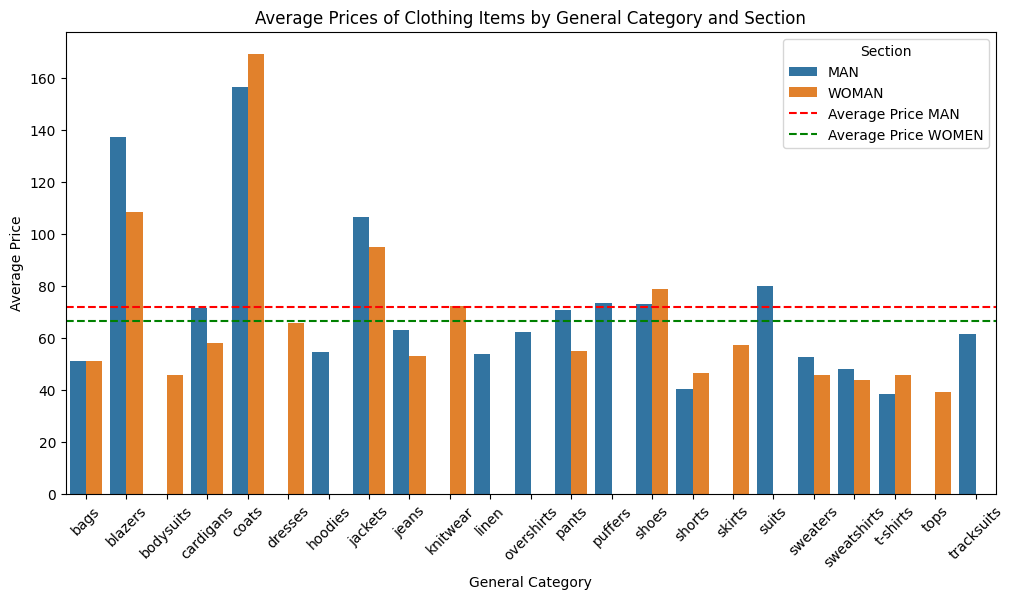

In [71]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=result_df, x='terms', y='average_price', hue='section')

# Set the title and labels
plt.title('Average Prices of Clothing Items by General Category and Section')
plt.xlabel('General Category')
plt.ylabel('Average Price')

#rotate x-ticks by 45 degrees
plt.xticks(rotation=45)

#Include horizontal line for average price of MEN and WOMEN section
plt.axhline(y=result_df[result_df['section'] == 'MAN']['average_price'].mean(), color='r', linestyle='--', label='Average Price MAN')
plt.axhline(y=result_df[result_df['section'] == 'WOMAN']['average_price'].mean(), color='g', linestyle='--', label='Average Price WOMEN')

# Show the legend
plt.legend(title='Section')

# Display the plot
plt.show()

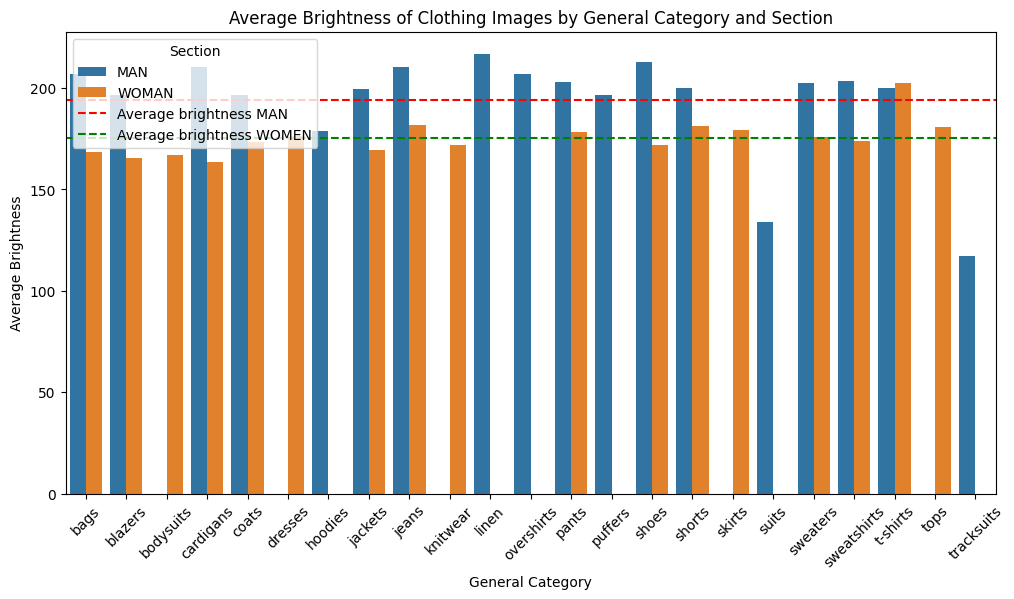

In [72]:
#Generate the same code as above but replace Avergae price with average brightness
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=result_df, x='terms', y='average_brightness', hue='section')

# Set the title and labels
plt.title('Average Brightness of Clothing Images by General Category and Section')
plt.xlabel('General Category')
plt.ylabel('Average Brightness')

#rotate x-ticks by 45 degrees
plt.xticks(rotation=45)

#Include horizontal line for average price of MEN and WOMEN section
plt.axhline(y=result_df[result_df['section'] == 'MAN']['average_brightness'].mean(), color='r', linestyle='--', label='Average brightness MAN')
plt.axhline(y=result_df[result_df['section'] == 'WOMAN']['average_brightness'].mean(), color='g', linestyle='--', label='Average brightness WOMEN')

# Show the legend
plt.legend(title='Section')

# Display the plot
plt.show()

<Axes: xlabel='section'>

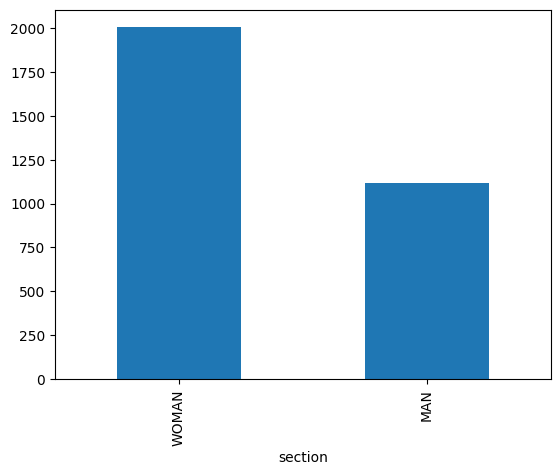

In [61]:
#Create plot showing count of terms per sectio
output['section'].value_counts().plot(kind='bar')

<Axes: xlabel='terms'>

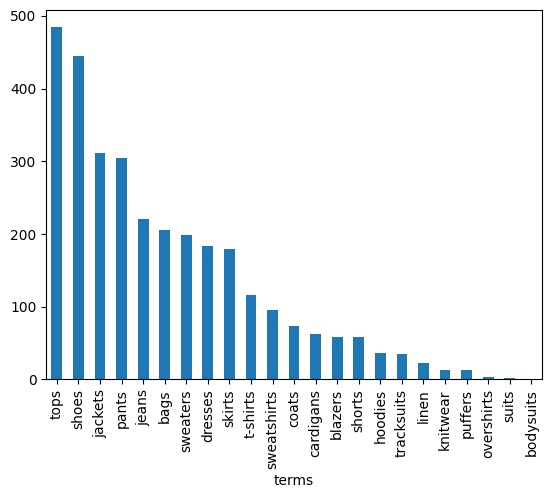

In [63]:
#Create plot showing count of categories in terms column.
output['terms'].value_counts().plot(kind='bar')

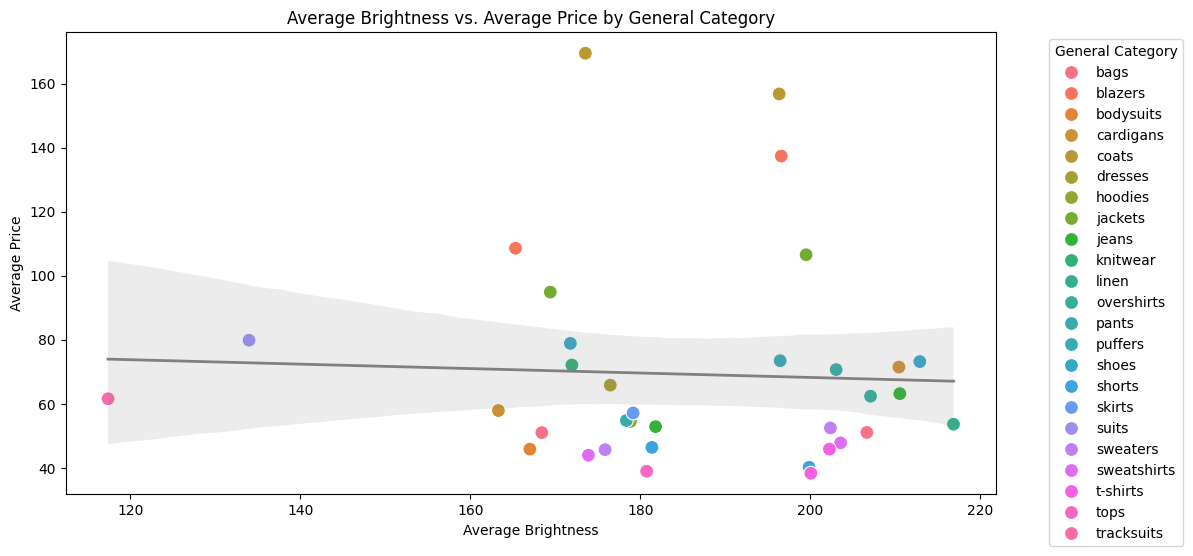

In [78]:
# Create a scatter plot with a regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_df, x='average_brightness', y='average_price', hue='terms', s=100)

# Add a regression line
sns.regplot(data=result_df, x='average_brightness', y='average_price', scatter=False, color='gray', line_kws={'lw': 2})

# Set the title and labels
plt.title('Average Brightness vs. Average Price by General Category')
plt.xlabel('Average Brightness')
plt.ylabel('Average Price')

# Show the legend next to plot
plt.legend(title='General Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()